In [5]:
import sys
import os

import matplotlib.pylab as pylab
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (25, 20),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)

In [6]:

import pandas as pd
from pandas import DataFrame

import matplotlib.pyplot as plt
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'


In [7]:
os.chdir(sys.path[3])
data_general = pd.read_csv(r'data/process/new_data.csv', skiprows=[1, 2]).reset_index()
data_general= data_general[data_general['Q18']=='Yes (including if damaged) ']


In [8]:

data_general

,index,StartDate,EndDate,Status,IPAddress,Progress,Duration (in seconds),Finished,RecordedDate,ResponseId,...,Q33_9_TEXT,Q34,Q35,Q36,Q37,Q38,Q39,Q39_10_TEXT,Q40,Q40_3_TEXT
4,4,4/22/2022 9:08,4/22/2022 9:24,IP Address,24.52.45.71,100,968,True,4/22/2022 9:24,R_3F2LBFhUg7Q8AbI,...,NaN,1959.0,Man,"Between $100,000 and $149,999 per year",Three,Associate’s/vocational/technical degree (2- or...,Multi-ethnic (2+ ethnic groups),NaN,Email,NaN
12,12,4/22/2022 11:59,4/22/2022 12:06,IP Address,172.58.46.144,100,447,True,4/22/2022 12:06,R_dhfK2aYioBlxNBv,...,NaN,1950.0,Man,"Under $20,000 per year",One,Some university (no degree),"European (e.g., British Isles, German, French,...",NaN,Other (please specify):,Online
15,15,4/22/2022 15:46,4/22/2022 15:54,IP Address,172.58.24.250,100,431,True,4/22/2022 15:54,R_2aa7pZekXZm89pb,...,NaN,1966.0,Man,"Under $20,000 per year",Two,Associate’s/vocational/technical degree (2- or...,Multi-ethnic (2+ ethnic groups),NaN,Email,NaN
18,18,4/22/2022 18:11,4/22/2022 18:17,IP Address,23.17.63.224,100,365,True,4/22/2022 18:17,R_1hLTjwnbRFOjKOD,...,NaN,1966.0,Woman,"$200,000 or more per year",Five or more,Bachelor’s degree (university 4-year degree) ...,"European (e.g., British Isles, German, French,...",NaN,Email,NaN
20,20,4/23/2022 18:00,4/23/2022 18:14,IP Address,72.198.57.234,100,834,True,4/23/2022 18:14,R_AI2OiSntoyzHkNX,...,NaN,1948.0,Man,"Between $150,000 and $199,999 per year",Three,Bachelor’s degree (university 4-year degree) ...,"European (e.g., British Isles, German, French,...",NaN,Email,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1976,1976,6/1/2022 9:10,6/1/2022 10:44,IP Address,98.171.142.89,100,5626,True,6/1/2022 10:44,R_YSIuSlYqzqWbv57,...,NaN,1971.0,Man,"Between $50,000 and $74,999 per year",Five or more,Associate’s/vocational/technical degree (2- or...,I prefer to not answer,NaN,Other (please specify):,Random face book link
1986,1986,6/1/2022 21:01,6/1/2022 21:08,IP Address,174.194.202.64,100,378,True,6/1/2022 21:08,R_2DSndRdlUwJM5Fr,...,NaN,1977.0,Woman,"Between $100,000 and $149,999 per year",Four,"Graduate degree (e.g., Master’s, Professional ...","European (e.g., British Isles, German, French,...",NaN,Other (please specify):,Facebook
1988,1988,6/2/2022 6:04,6/2/2022 6:09,IP Address,104.62.161.218,100,328,True,6/2/2022 6:09,R_DeZUrzWw0Cq2Zbj,...,NaN,1970.0,Man,"Between $75,000 and $99,999 per year",Five or more,Bachelor’s degree (university 4-year degree) ...,"European (e.g., British Isles, German, French,...",NaN,"A bicycle registry/recovery system (e.g., Bike...",NaN
2011,2011,6/4/2022 12:30,6/5/2022 14:34,IP Address,98.60.66.166,100,93867,True,6/5/2022 14:34,R_25GzXFZytf3CUK5,...,NaN,1992.0,Man,"Between $100,000 and $149,999 per year",Four,"Graduate degree (e.g., Master’s, Professional ...","European (e.g., British Isles, German, French,...",NaN,Email,NaN


## Questions analysis based on recovery and non-recovery:

In [9]:
q_research= 'Q20'
cols = list(data_general[data_general[q_research].notnull()][q_research].unique())
colors =['green','orange']
abbr = {'Q2':'part','Q4':'year','Q5':'month','Q6':'day_time','Q7':'is_locked','Q8':'locked_type','Q9':'theft_location','Q10':'is_regi','Q11':'report_loc','Q12':'is_insured','Q13':'estimate_val','Q14':'is_electric','Q15':'bike_type','Q17':'is_university','Q19':'is_online','Q21':'is_police_assist','Q23':'recovery_loc','Q24':'con_recovery','Q34': 'birth', 'Q35': 'gender', 'Q36': 'income', 'Q38': 'education', 'Q39': 'ethnic_origin'}
cols

['The police found it and returned it to me\u200b',
 'I recovered it with online support (e.g., Bike Index, Facebook recovery groups)',
 '\u200bI found and recovered it myself ',
 'A member of the public/friend/family member found it and returned it to me',
 'Other (please specify):']

## All the demographic parameters

In [10]:
data_store= []
# The code run over each tuple
for pair in {'Q10':'Is registered','Q13':'estimate_val', 'Q35': 'gender', 'Q36': 'income', 'Q38': 'education'}.items():
    print(pair)
    # Get the question number and its new name
    question_number = pair[0]
    per_name = pair[1]
    # count stat per non/recovery and question_number
    sumy = DataFrame(index=list(data_general[data_general[question_number].notnull()][question_number].unique()))
    for i,name in enumerate(cols):
        rel_demographic = DataFrame(data_general[data_general[q_research] == name][question_number])

        # Rearrange data
        rel_demographic = rel_demographic.rename(columns={question_number: per_name})
        rel_demographic = rel_demographic[rel_demographic[per_name].notna()].reset_index()

        # calculate absolute and relative count for each veritable
        sumy[[name]] = rel_demographic.groupby(by=[per_name]).count().rename(columns={'index': name})
        sumy.index.name = per_name
    # add the new data to datastore which will present latter
    data_store.append(sumy.fillna(0).astype('int32'))


('Q10', 'Is registered')
('Q13', 'estimate_val')
('Q35', 'gender')
('Q36', 'income')
('Q38', 'education')


In [11]:
data_store

[                     The police found it and returned it to me​  \
 Is registered                                                     
 Yes                                                          46   
 No                                                           49   
 Don’t know/not sure                                           1   
 
                      I recovered it with online support (e.g., Bike Index, Facebook recovery groups)  \
 Is registered                                                                                          
 Yes                                                                 19                                 
 No                                                                  37                                 
 Don’t know/not sure                                                  1                                 
 
                      ​I found and recovered it myself   \
 Is registered                                            
 Yes         

In [12]:
per_cols_by_ans = ['per_'+ col for col in cols]
## It combines two real and percentage values into one column
def prep_for_export(test):
    real = test[cols].apply(lambda x: str(int(x))).reset_index(drop=True)
    per = test[per_cols_by_ans].apply(lambda x: ' ('  + str(int(round(x,0))) + '%' + ')').reset_index(drop=True)
    return real + per


Is registered
those are not include in the results presentation since less than 46.5 tolerance                       The police found it and returned it to me​  \
Is registered                                                     
Don’t know/not sure                                           1   

                     I recovered it with online support (e.g., Bike Index, Facebook recovery groups)  \
Is registered                                                                                          
Don’t know/not sure                                                  1                                 

                     ​I found and recovered it myself   \
Is registered                                            
Don’t know/not sure                                  1   

                     A member of the public/friend/family member found it and returned it to me  \
Is registered                                                                                     
Don’t know/not s

,The police found it and returned it to me​,"I recovered it with online support (e.g., Bike Index, Facebook recovery groups)",​I found and recovered it myself,A member of the public/friend/family member found it and returned it to me,Other (please specify):
Is registered,,,,,
Yes,46 (38%),19 (16%),26 (22%),13 (11%),16 (13%)
No,49 (32%),37 (24%),27 (18%),15 (10%),26 (17%)


<AxesSubplot:xlabel='Is registered'>

estimate_val
those are not include in the results presentation since less than 17.4375 tolerance                        The police found it and returned it to me​  \
estimate_val                                                       
$7000 or more                                                  3   
Less than $250                                                 2   
Don’t know/not sure                                            0   

                      I recovered it with online support (e.g., Bike Index, Facebook recovery groups)  \
estimate_val                                                                                            
$7000 or more                                                         4                                 
Less than $250                                                        4                                 
Don’t know/not sure                                                   0                                 

                      ​I found and 

,The police found it and returned it to me​,"I recovered it with online support (e.g., Bike Index, Facebook recovery groups)",​I found and recovered it myself,A member of the public/friend/family member found it and returned it to me,Other (please specify):
estimate_val,,,,,
$2000-3999,30 (44%),10 (15%),8 (12%),8 (12%),12 (18%)
$1000-$1999,19 (29%),15 (23%),17 (26%),5 (8%),10 (15%)
$500-$999,21 (37%),9 (16%),14 (25%),5 (9%),8 (14%)
$4000-6999,9 (33%),6 (22%),3 (11%),3 (11%),6 (22%)
$250-$499,12 (32%),9 (24%),9 (24%),1 (3%),6 (16%)


<AxesSubplot:xlabel='estimate_val'>

for The police found it and returned it to me​ (44.12) : $2000-3999       is outlier (new_mean:32.85, new_std:3.31)
for I recovered it with online support (e.g., Bike Index, Facebook recovery groups) (14.71) : $2000-3999       is outlier (new_mean:21.27, new_std:3.76)
for ​I found and recovered it myself  (11.11) : $4000-6999        is outlier (new_mean:21.6, new_std:6.59)
for A member of the public/friend/family member found it and returned it to me (2.7) : $250-$499  is outlier (new_mean:9.81, new_std:1.96)
for Other (please specify): (22.22) : $4000-6999        is outlier (new_mean:15.76, new_std:1.54)
gender
those are not include in the results presentation since less than 33.625 tolerance                             The police found it and returned it to me​  \
gender                                                                  
Non-binary / third gender                                           0   
Prefer not to say                                                   0   

   

,The police found it and returned it to me​,"I recovered it with online support (e.g., Bike Index, Facebook recovery groups)",​I found and recovered it myself,A member of the public/friend/family member found it and returned it to me,Other (please specify):
gender,,,,,
Man,59 (36%),28 (17%),33 (20%),18 (11%),27 (16%)
Woman,33 (33%),23 (23%),17 (17%),10 (10%),16 (16%)


<AxesSubplot:xlabel='gender'>

income
those are not include in the results presentation since less than 13.4 tolerance                                        The police found it and returned it to me​  \
income                                                                             
Under $20,000 per year                                                         0   
Between $35,000 and $49,999 per year                                           4   
Don’t know/not sure                                                            0   

                                      I recovered it with online support (e.g., Bike Index, Facebook recovery groups)  \
income                                                                                                                  
Under $20,000 per year                                                                1                                 
Between $35,000 and $49,999 per year                                                  2                                 
Don’t 

,The police found it and returned it to me​,"I recovered it with online support (e.g., Bike Index, Facebook recovery groups)",​I found and recovered it myself,A member of the public/friend/family member found it and returned it to me,Other (please specify):
income,,,,,
"Between $100,000 and $149,999 per year",14 (32%),12 (27%),7 (16%),5 (11%),6 (14%)
"$200,000 or more per year",18 (35%),6 (12%),10 (20%),5 (10%),12 (24%)
"Between $150,000 and $199,999 per year",11 (37%),5 (17%),1 (3%),6 (20%),7 (23%)
"Between $50,000 and $74,999 per year",12 (32%),6 (16%),9 (24%),5 (13%),6 (16%)
"Between $75,000 and $99,999 per year",10 (27%),12 (32%),8 (22%),2 (5%),5 (14%)
I prefer to not answer,14 (56%),4 (16%),3 (12%),1 (4%),3 (12%)
"Between $20,000 and $34,999 per year",9 (53%),4 (24%),3 (18%),0 (0%),1 (6%)


<AxesSubplot:xlabel='income'>

for The police found it and returned it to me​ (56.0) : I prefer to not answer is outlier (new_mean:35.89, new_std:9.0)
for I recovered it with online support (e.g., Bike Index, Facebook recovery groups) (32.43) : Between $75,000 and $99,999 per year is outlier (new_mean:18.5, new_std:5.74)
for ​I found and recovered it myself  (3.33) : Between $150,000 and $199,999 per year is outlier (new_mean:18.41, new_std:4.18)
for A member of the public/friend/family member found it and returned it to me (20.0) : Between $150,000 and $199,999 per year is outlier (new_mean:7.29, new_std:5.0)
for Other (please specify): (5.88) : Between $20,000 and $34,999 per year is outlier (new_mean:16.97, new_std:5.15)
education
those are not include in the results presentation since less than 19.142857142857142 tolerance                                                      The police found it and returned it to me​  \
education                                                                                    

,The police found it and returned it to me​,"I recovered it with online support (e.g., Bike Index, Facebook recovery groups)",​I found and recovered it myself,A member of the public/friend/family member found it and returned it to me,Other (please specify):
education,,,,,
Some university (no degree),7 (26%),4 (15%),9 (33%),2 (7%),5 (19%)
Bachelor’s degree (university 4-year degree) \t,38 (36%),25 (24%),23 (22%),10 (10%),9 (9%)
"Graduate degree (e.g., Master’s, Professional degree, Doctorate)",29 (28%),20 (19%),16 (15%),12 (12%),27 (26%)


<AxesSubplot:xlabel='education'>

for The police found it and returned it to me​ (36.19) : Bachelor’s degree (university 4-year degree)             	  is outlier (new_mean:26.91, new_std:1.39)
for I recovered it with online support (e.g., Bike Index, Facebook recovery groups) (23.81) : Bachelor’s degree (university 4-year degree)             	  is outlier (new_mean:17.02, new_std:3.12)
for ​I found and recovered it myself  (33.33) : Some university (no degree)  is outlier (new_mean:18.64, new_std:4.61)
for A member of the public/friend/family member found it and returned it to me (7.41) : Some university (no degree)  is outlier (new_mean:10.53, new_std:1.42)
for Other (please specify): (8.57) : Bachelor’s degree (university 4-year degree)             	  is outlier (new_mean:22.24, new_std:5.26)


C:\Users\Achituv\AppData\Local\Temp\ipykernel_23820\3025642355.py:26: UserWarning: Glyph 9 (	) missing from current font.
  plt.savefig('python/notebooks/output/{}/figs/'.format(q_research)+q_name+'.png')


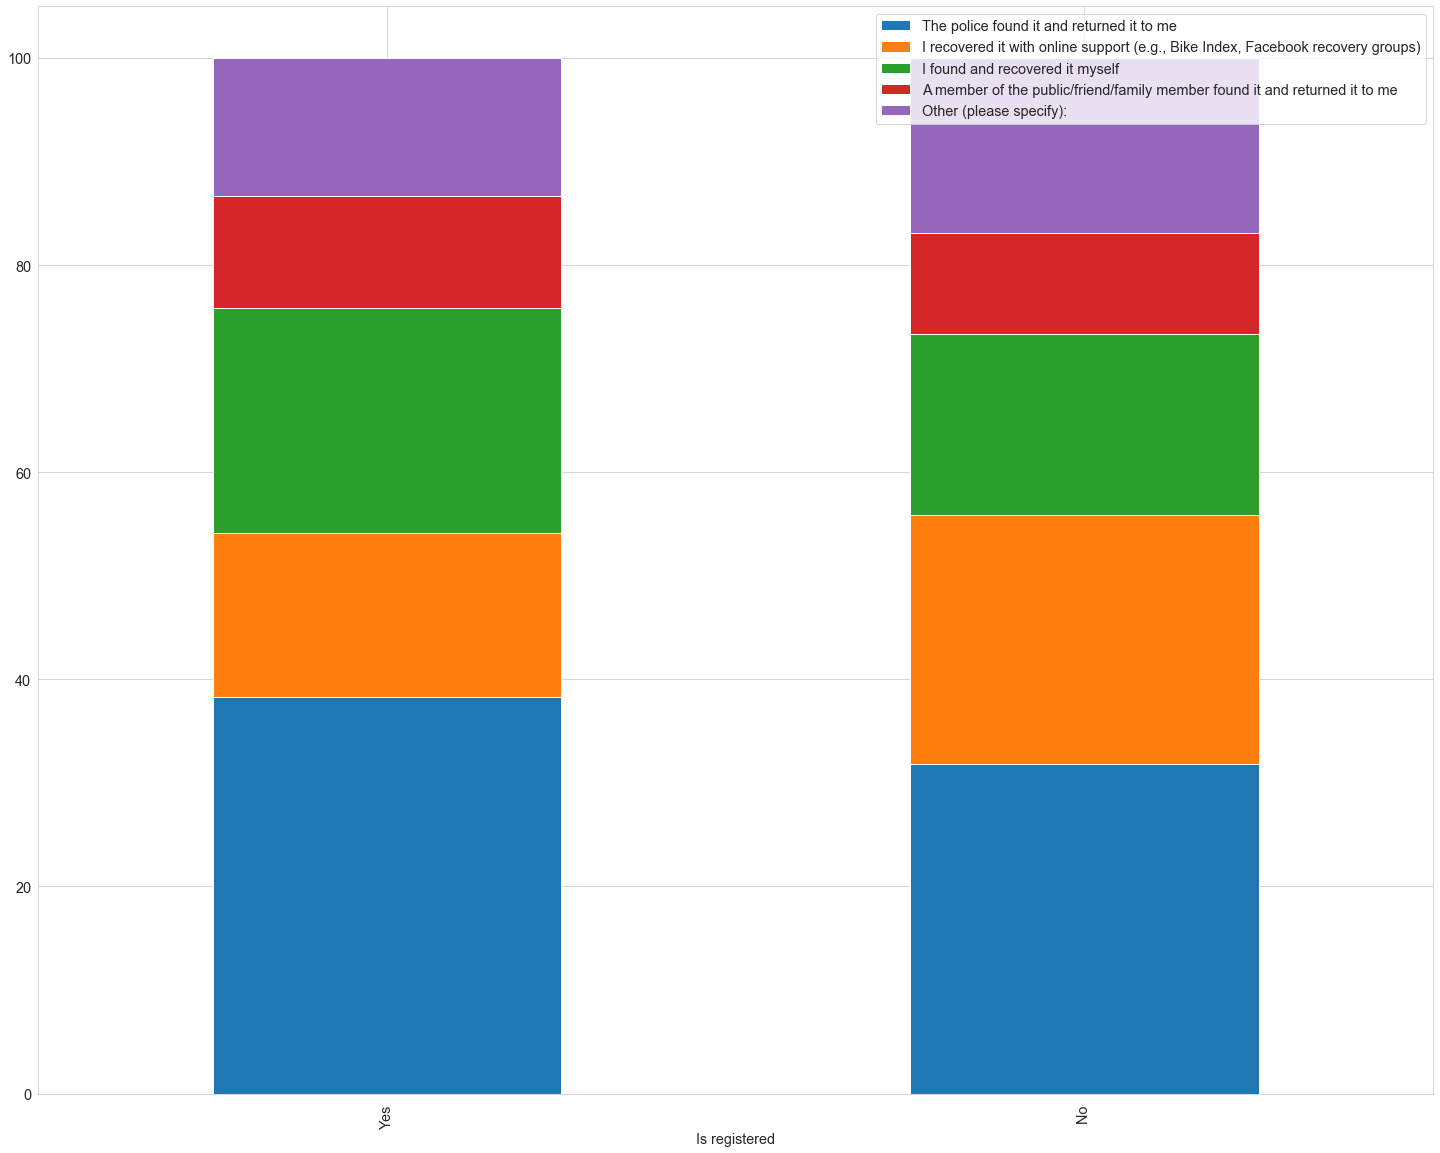

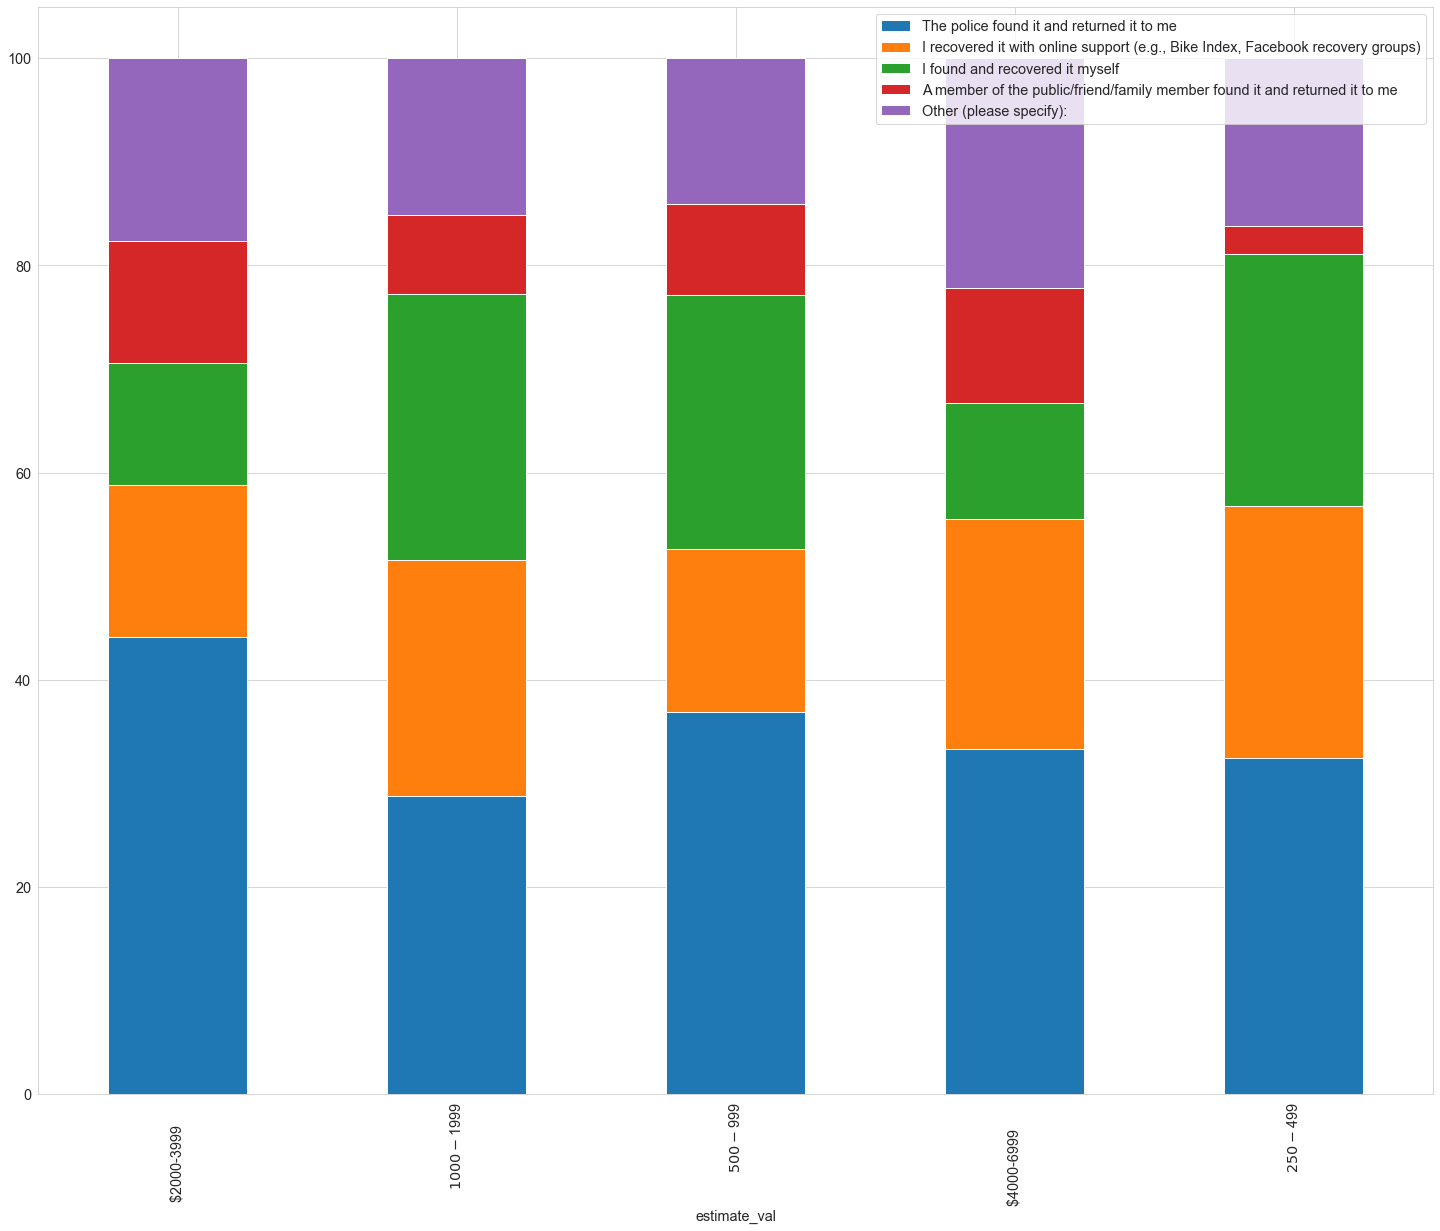

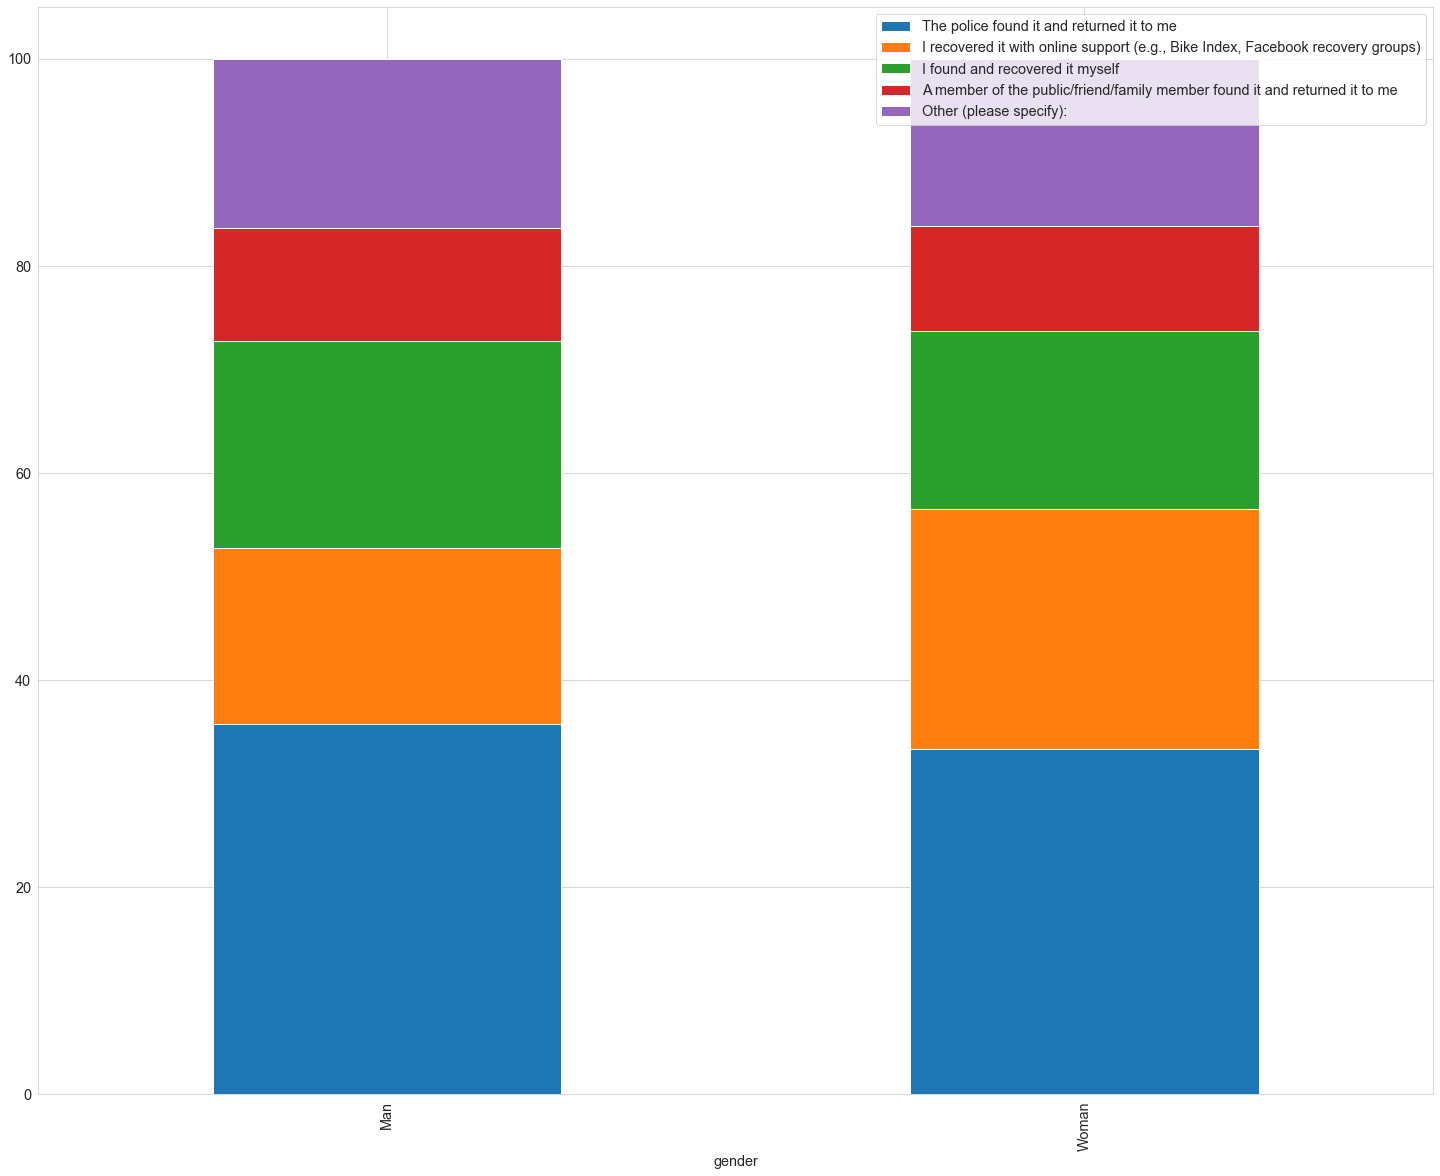

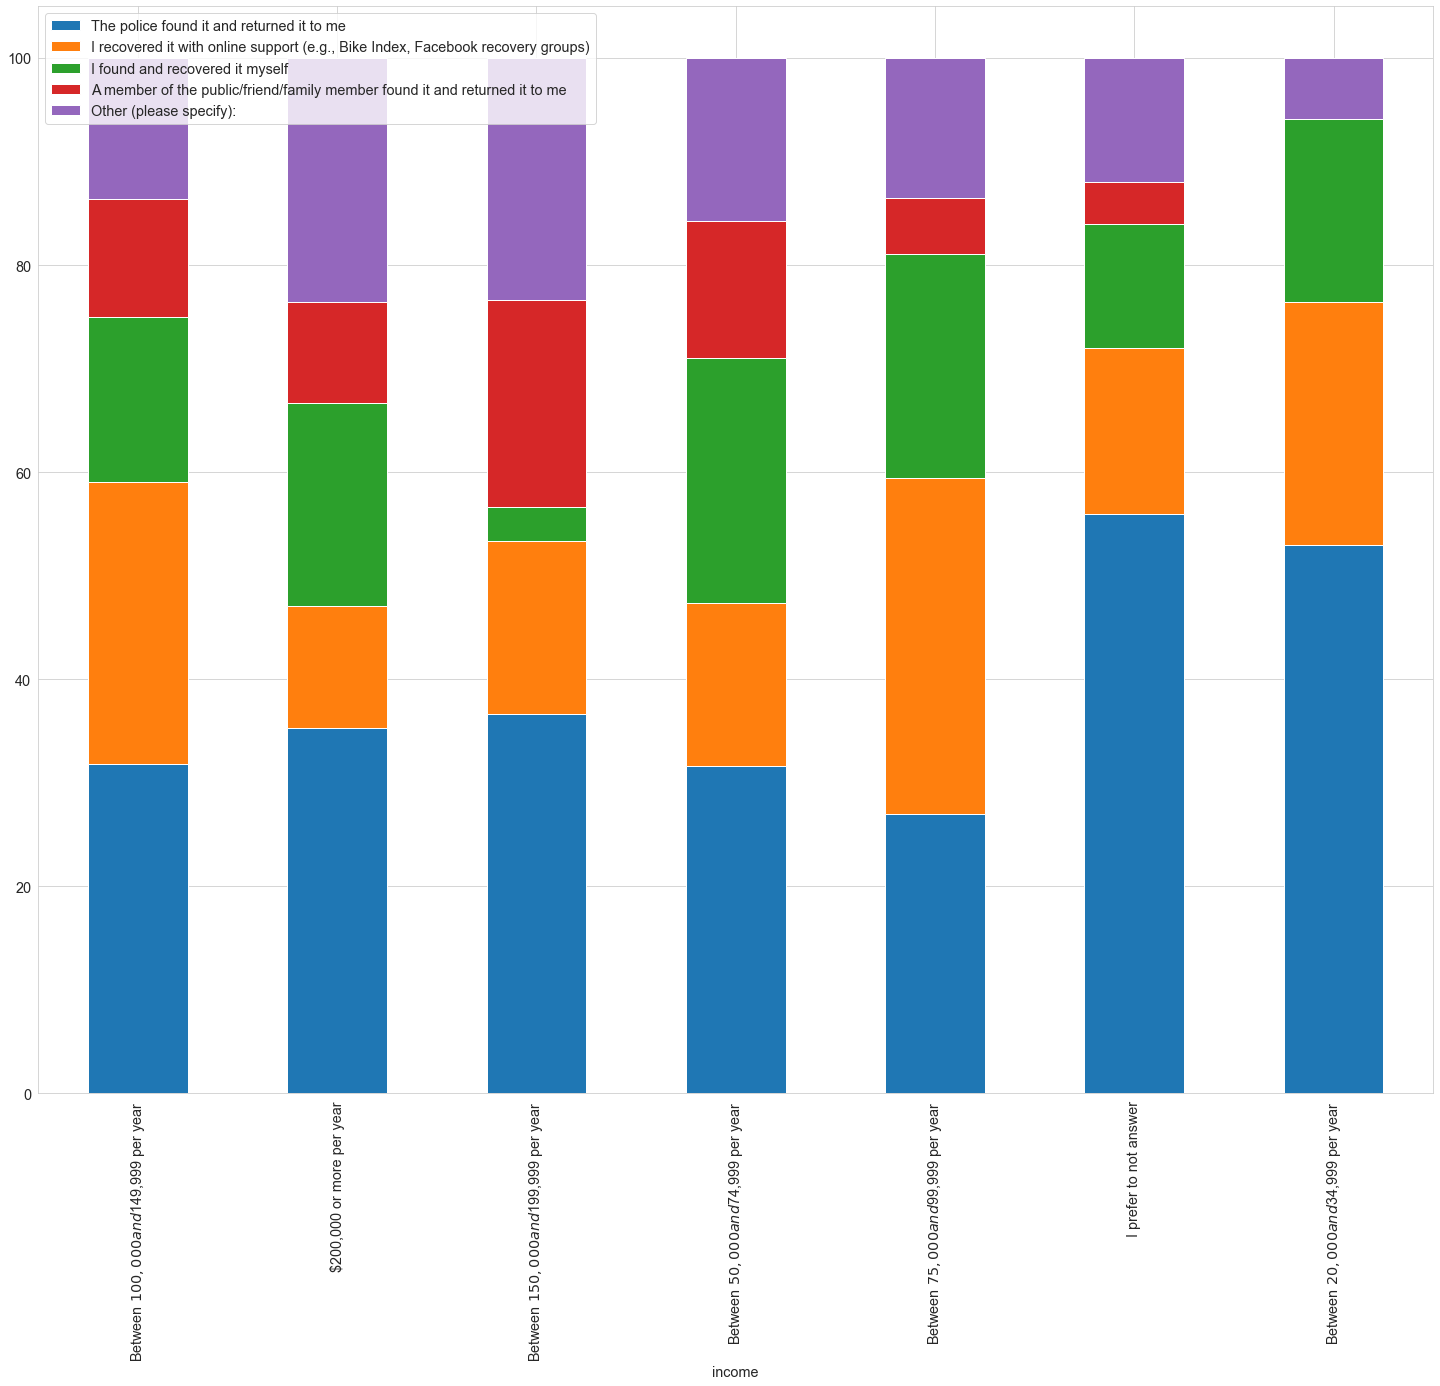

C:\Users\Achituv\anaconda3\envs\ox\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


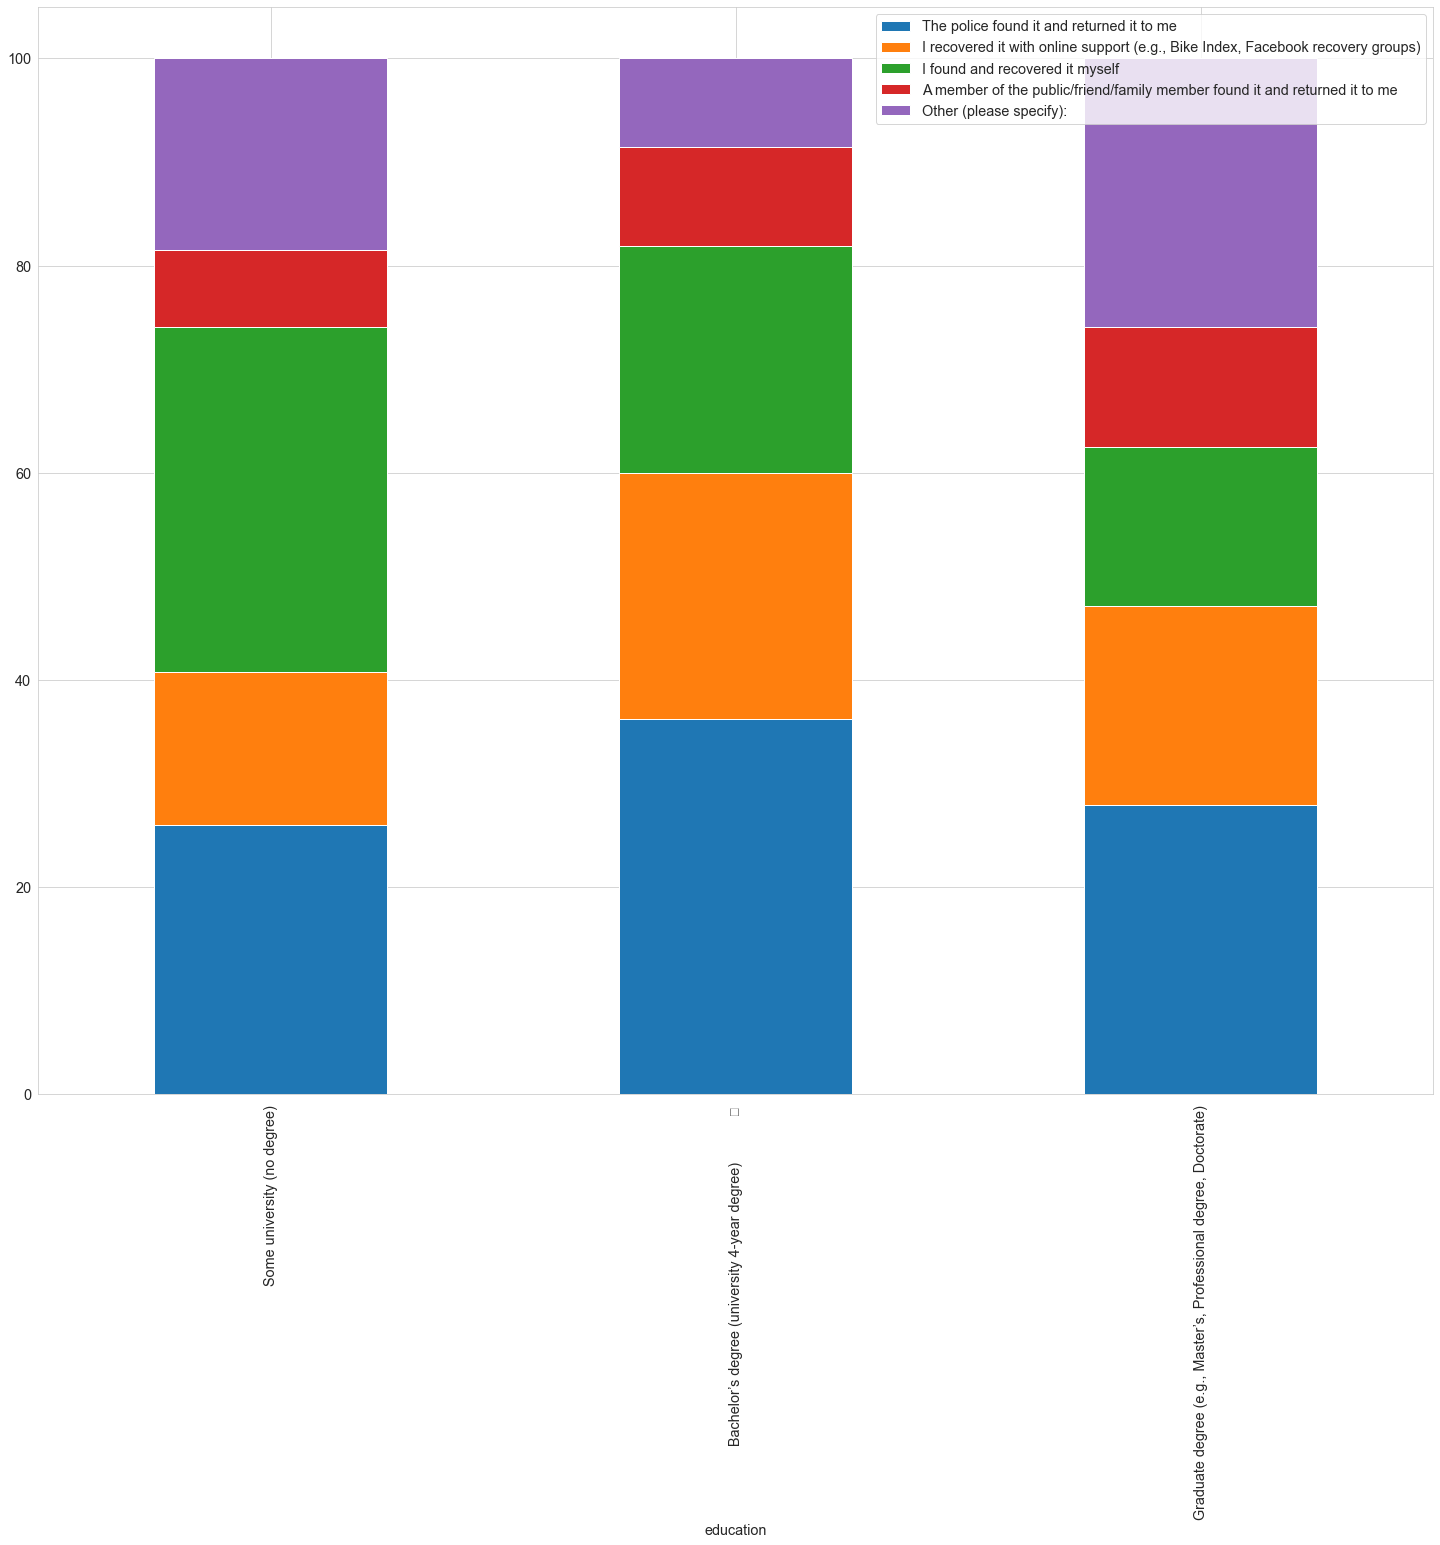

In [13]:
for dft in data_store:
    df= dft.copy()
    q_name = df.index.name
    print(q_name)
    # Calculate recovery-based distributions for the possible answers to a given question

    sum_per_answer = df.sum(axis=1)
    df[per_cols_by_ans] = df.div(sum_per_answer, axis=0)*100

    # Less popular answers  should be removed, which is relative to the number of possible answers
    temp_sum = df[cols].sum().sum()
    tolerance = temp_sum/(len(df)*2)
    rem_df = df[sum_per_answer<tolerance]
    print('those are not include in the results presentation since less than {} tolerance  {}'.format(tolerance,rem_df))
    new_df = df[sum_per_answer>tolerance]
    # Make a table to export with the real and relative (%) values on the same column
    df_table= DataFrame(columns=cols)
    df_table[df_table.columns] = new_df.apply(lambda x: prep_for_export(x),axis=1)
    df_table.to_csv('python/notebooks/output/{}/csv/'.format(q_research)+ q_name +'.csv')
    df_table

    # Plot the results and save them on the disk
    df_show= DataFrame(columns=cols)
    df_show[cols] = new_df[per_cols_by_ans]
    df_show.plot.bar(stacked=True)
    plt.savefig('python/notebooks/output/{}/figs/'.format(q_research)+q_name+'.png')

    # Indicate when there is interesting results
    find_max= df_show.copy()
    # res save the index of the one with max absolute distance from the average
    res= (abs(find_max.mean() - find_max).idxmax())
    def is_intersting_def(temp_col):
        df_filter = temp_col.reset_index() # Move the question to a column
        outlier_place = df_filter.columns[-1]  # The state to examine
        outlier_att = res[outlier_place] # A possible outlier answer

        # The value for  the possible outlier answer
        is_intersting = df_filter[df_filter[q_name]==outlier_att]
        val_outlier = is_intersting[outlier_place]
        val_outlier
        # Determine the mean and standard deviation without taking into account suspicious outlier
        not_outlier = df_filter[df_filter[q_name]!=outlier_att][outlier_place]
        new_mean = not_outlier.mean()
        new_std = not_outlier.std()
        # Test to determine if it is an outlier and to find out if the results are interesting
        if (abs(val_outlier - new_mean) - new_std> 0).any():
            print ('for {} ({}) : {} is outlier (new_mean:{}, new_std:{})'.format(outlier_place,round(val_outlier.values[0],2),outlier_att,round(new_mean,2),round(new_std,2)))
    res =find_max.apply(is_intersting_def)